<a href="https://colab.research.google.com/github/yavuzselimikizler/Machine-Learning/blob/main/desicion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math



from sklearn import *
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# example of making multiple probability predictions
from sklearn.linear_model import LogisticRegression

## Importing the dataset

In [ ]:
coll_list=["duration","age","day","campaign","pdays","previous"]
coll_listsec=["balance"]
coll_listbool=["default","housing","loan"]
coll_listtird=["job","marital","education","contact","month","poutcome"]
coll_list2=["y"]
df=pd.read_csv('/content/drive/MyDrive/bank/bank.csv', sep=';',usecols=coll_list)
da=pd.read_csv('/content/drive/MyDrive/bank/bank.csv', sep=';',usecols=coll_listsec)
dd=pd.read_csv('/content/drive/MyDrive/bank/bank.csv', sep=';',usecols=coll_list2)
dj=pd.read_csv('/content/drive/MyDrive/bank/bank.csv', sep=';',usecols=coll_listtird)
bl=pd.read_csv('/content/drive/MyDrive/bank/bank.csv', sep=';',usecols=coll_listbool)
job_list=[]
first=[]
add_list=[0,1,2,3,4,5]
add_number_list=[0,1,2,3,4,5]
full_number=np.array(df)
full_jb=np.array(dj)
jb=[]
for i in range(len(full_jb)):
  my_row=[]
  for j in add_list:
      my_row.append(full_jb[i][j])
  jb.append(my_row)    

for i in range(len(full_number)):
  my_row=[]
  for j in add_number_list:
      my_row.append(full_number[i][j])
  first.append(my_row)   

bb=np.array(bl)

boll_arr=[]
for i in range(len(bb)):
  row_b=[]
  for j in range(len(bb[0])):
   if bb[i][j]=='yes':
     row_b.append(1)
   else:
     row_b.append(0) 
  boll_arr.append(row_b)
bb=np.array(boll_arr)
print(bb)

td_job=[]
for j in range(len(jb[0])):
 job_oned=[]
 for i in range(len(jb)):
  if jb[i][j] not in job_list:
    job_list.append(jb[i][j])

print(job_list)  

for i in range(len(jb)):
   
    row_list=[]
    for j in range(len(job_list)):

     if job_list[j] in jb[i]:
       row_list.append(1)
     else:
      row_list.append(0) 
    td_job.append(row_list) 

print(td_job)

print(td_job)            
jb=np.array(td_job)
first=np.array(first)
second=np.array(da)
train_x=np.concatenate((first, second), axis=1)
train_x=np.concatenate((train_x, jb), axis=1)
train_x=np.concatenate((train_x, bb), axis=1)
train_y=np.array(dd).flatten()
print(job_list)

counter=0
for i in train_y:
   if i=='yes':
     train_y[counter]=1
     
   else:
     train_y[counter]=0  
     
   counter+=1

train_y=train_y.astype('int')
   


print(len(train_x))
print(train_x[0])    
print(len(train_x[0]))


[[0 0 0]
 [0 1 1]
 [0 1 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 1 1]]
['unemployed', 'services', 'management', 'blue-collar', 'self-employed', 'technician', 'entrepreneur', 'admin.', 'student', 'housemaid', 'retired', 'unknown', 'married', 'single', 'divorced', 'primary', 'secondary', 'tertiary', 'cellular', 'telephone', 'oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov', 'sep', 'mar', 'dec', 'failure', 'other', 'success']
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Splitting the dataset into the Training set and Test set

In [ ]:
coll_list3=["duration","age","day","campaign","pdays","previous"]
coll_list3sec=["balance"]
coll_list4=["y"]

dg=pd.read_csv('/content/drive/MyDrive/bank/bank-full.csv', sep=';',usecols=coll_list3)
dc=pd.read_csv('/content/drive/MyDrive/bank/bank-full.csv', sep=';',usecols=coll_list3sec)
db=pd.read_csv('/content/drive/MyDrive/bank/bank-full.csv', sep=';',usecols=coll_list4)
djob=pd.read_csv('/content/drive/MyDrive/bank/bank-full.csv', sep=';',usecols=coll_listtird)
bll=pd.read_csv('/content/drive/MyDrive/bank/bank-full.csv', sep=';',usecols=coll_listbool)

job_list=[]

bbl=np.array(bll)
first=[]
add_list=[0,1,2,3,4,5]
add_number_list=[0]
full_number=np.array(dg)
full_jb=np.array(djob)
jobb=[]
for i in range(len(full_jb)):
  my_row=[]
  for j in add_list:
      my_row.append(full_jb[i][j])
  jobb.append(my_row)    

for i in range(len(full_number)):
  my_row=[]
  for j in add_number_list:
      my_row.append(full_number[i][j])
  first.append(my_row) 
boll_arr=[]
for i in range(len(bbl)):
  row_b=[]
  for j in range(len(bbl[0])):
   if bbl[i][j]=='yes':
     row_b.append(1)
   else:
     row_b.append(0) 
  boll_arr.append(row_b)
bbl=np.array(boll_arr)

counter=0
print(djob)
td_job=[]
for j in range(len(jobb[0])):
 job_oned=[]
 for i in range(len(jobb)):
  if jobb[i][j] not in job_list:
    job_list.append(jobb[i][j])

for i in range(len(jobb)):
   
    row_list=[]
    for j in range(len(job_list)):

     if job_list[j] in jobb[i]:
       row_list.append(1)
     else:
      row_list.append(0) 
    td_job.append(row_list) 

jobb=np.array(td_job)
print(jobb)
train_y=np.array(db).flatten()
first=np.array(first)

second=np.array(dc)
train_x=np.concatenate((first, second), axis=1)
"""train_x=np.concatenate((train_x, jobb), axis=1)
train_x=np.concatenate((train_x, bbl), axis=1)"""
for i in train_y:
   if i=='yes':
     train_y[counter]=1
     
   else:
     train_y[counter]=0  
     
 
   counter+=1
   """
for j in range(len(train_x)):
  for k in range(len(train_x[0])):
   if train_x[j][k]=='unknown':
     train_x[j][k]=0
"""  
train_y=train_y.astype('int')
print(train_x[0])
print(len(train_x[0]))

                job   marital  education    contact month poutcome
0        management   married   tertiary    unknown   may  unknown
1        technician    single  secondary    unknown   may  unknown
2      entrepreneur   married  secondary    unknown   may  unknown
3       blue-collar   married    unknown    unknown   may  unknown
4           unknown    single    unknown    unknown   may  unknown
...             ...       ...        ...        ...   ...      ...
45206    technician   married   tertiary   cellular   nov  unknown
45207       retired  divorced    primary   cellular   nov  unknown
45208       retired   married  secondary   cellular   nov  success
45209   blue-collar   married  secondary  telephone   nov  unknown
45210  entrepreneur   married  secondary   cellular   nov    other

[45211 rows x 6 columns]
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]]
[  58 2143]
2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_x = sc.fit_transform(train_x)
#test_x = sc.transform(test_x)
print(train_x)
#print(test_x)

[[-1.05626965  0.37405206 -0.7118608  ... -0.1307588  -1.14205138
  -0.42475611]
 [-0.77258281 -0.59602646 -0.16919389 ... -0.1307588   0.87561735
   2.3542922 ]
 [-0.58345826  0.01027262 -0.30389844 ... -0.1307588   0.87561735
  -0.42475611]
 ...
 [ 1.49691189  0.37405206 -0.43475429 ... -0.1307588  -1.14205138
  -0.42475611]
 [-1.24539421 -1.20232553 -0.51942573 ... -0.1307588  -1.14205138
  -0.42475611]
 [ 0.26760226 -1.56610497  0.3118938  ... -0.1307588   0.87561735
   2.3542922 ]]


In [ ]:
import random
def rand_gen(start,end,rand_l,mixed_train):
  rand_list_return=[]
  for i in range(start,end-1):
    rand_list_return.append(mixed_train[rand_l[i]])

  return rand_list_return  

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
def get_classifier(train_x,train_y,training_type):
  
 if training_type==1:

  classifier=DecisionTreeClassifier(criterion='entropy',random_state=0,ccp_alpha=0.002)
  

 elif training_type==2:
  classifier = SVC(kernel='linear', C=2,random_state=0,probability=True)  
   
 elif training_type==3:
  classifier = SVC(kernel='poly', degree=2,probability=True)


 classifier.fit(train_x,train_y)
 return classifier




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
def plot_roc_curve(y_test, y_pred,test_x,model):
   

   y_pred_proba = model.predict_proba(test_x)[::,1]
   fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
   gmean = np.sqrt(tpr * (1 - fpr))

   # Find the optimal threshold
   index = np.argmax(gmean)
   #create ROC curve
   fprOpt = round(fpr[index], ndigits = 4)
   tprOpt = round(tpr[index], ndigits = 4)
   plt.plot(fpr,tpr)
   plt.ylabel('True Positive Rate')
   plt.xlabel('False Positive Rate')

   plt.show()
   print("{} : x value, {} : y value",fprOpt,tprOpt)

In [ ]:
import random
def generate_randlist(train_crossx):
 rand_list=[]
 train_x_full=[]
 train_y_full=[]
 while len(rand_list)<len(train_crossx)-1:
   number=random.randint(0,len(train_crossx)-1)

   if(number not in rand_list):
     rand_list.append(number)
 
 return rand_list

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import math 
def cross_val(train_x,train_y,test_x,test_y):

 # rand_list=generate_randlist(train_x)




 pnum=0
 nnum=0

 

 """
 train_x1=rand_gen(0,math.floor(len(train_x)/5),rand_list,train_x)
 train_y1=rand_gen(0,math.floor(len(train_x)/5),rand_list,train_y)
 train_x2=rand_gen(math.floor(len(train_x)/5),math.floor((len(train_x)/5)*2),rand_list,train_x)
 train_y2=rand_gen(math.floor(len(train_x)/5),math.floor((len(train_x)/5)*2),rand_list,train_y)
 train_x3=rand_gen(math.floor((len(train_x)/5)*2),math.floor((len(train_x)/5)*3),rand_list,train_x)
 train_y3=rand_gen(math.floor((len(train_x)/5)*2),math.floor((len(train_x)/5)*3),rand_list,train_y)
 train_x4=rand_gen(math.floor((len(train_x)/5)*3),math.floor((len(train_x)/5)*4),rand_list,train_x)
 train_y4=rand_gen(math.floor((len(train_x)/5)*3),math.floor((len(train_x)/5)*4),rand_list,train_y)
 train_x5=rand_gen(math.floor((len(train_x)/5)*4),math.floor((len(train_x)/5)*5),rand_list,train_x)
 train_y5=rand_gen(math.floor((len(train_x)/5)*4),math.floor((len(train_x)/5)*5),rand_list,train_y)
 
 classifier1=get_classifier(train_x1,train_y1,type_op)
 print("1 ready")
 classifier2=get_classifier(train_x2,train_y2,type_op)
 print("2 ready")
 classifier3=get_classifier(train_x3,train_y3,type_op)
 print("3 ready")
 classifier4=get_classifier(train_x4,train_y4,type_op)
 print("4 ready")
 classifier5=get_classifier(train_x5,train_y5,type_op)

 y_pred1=classifier1.predict(test_x)
 y_pred2=classifier2.predict(test_x)
 y_pred3=classifier3.predict(test_x)
 y_pred4=classifier4.predict(test_x)
 y_pred5=classifier5.predict(test_x)
 """
 type_op=2
 classifier=get_classifier(train_x,train_y,type_op)
 y_pred=classifier.predict(test_x)
 classifier.fit(train_x,train_y)
 """for i in range(len(test_x)):
  if y_pred1[i]==1:
    pnum+=1
  else:
    nnum+=1
  if y_pred2[i]==1:
    pnum+=1
  else:
    nnum+=1
  if y_pred3[i]==1:
    pnum+=1
  else:
    nnum+=1
  if y_pred4[i]==1:
    pnum+=1
  else:
    nnum+=1
  if y_pred5[i]==1:
    pnum+=1
  else:
    nnum+=1

  if pnum>nnum:
    y_pred.append(1)
  else:
    y_pred.append(0)

  pnum=0
  nnum=0
"""
 a=accuracy_score(test_y, y_pred)
 print("Current accuracy is {}%".format(a*100))
 cm = confusion_matrix(test_y, y_pred)
 print(cm)
 if(type_op==2 or type_op==3):
   plot_roc_curve(test_y,y_pred,test_x,classifier)
 
 
 return a

4521
Current accuracy is 89.04867256637168%
[[787  12]
 [ 87  18]]


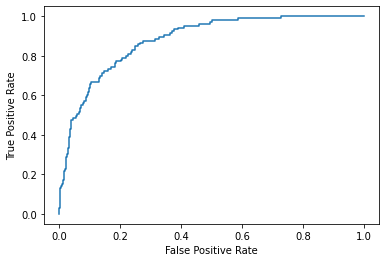

{} : x value, {} : y value 0.2641 0.8667
Current accuracy is 89.03654485049833%
[[789  10]
 [ 89  15]]


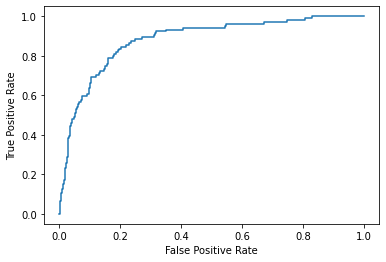

{} : x value, {} : y value 0.204 0.8462
Current accuracy is 90.36544850498339%
[[791   8]
 [ 79  25]]


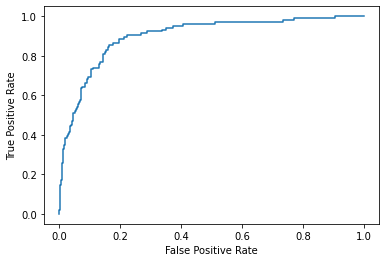

{} : x value, {} : y value 0.1627 0.8558
Current accuracy is 90.03322259136213%
[[791   8]
 [ 82  22]]


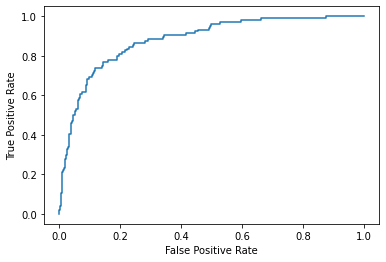

{} : x value, {} : y value 0.1452 0.7692
Current accuracy is 88.26135105204872%
[[786  13]
 [ 93  11]]


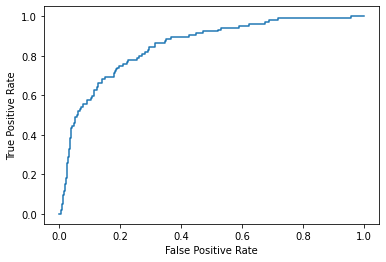

{} : x value, {} : y value 0.2265 0.7788


Cross-Validation accuracy: %.3f  89.34904791305286


In [ ]:
from sklearn.model_selection import StratifiedKFold
scores=[]

print(len(train_x))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
for train_index, test_index in skf.split(train_x, train_y):
   train_crossx=[]
   train_crossy=[]
   test_crossx=[]
   test_crossy=[]
   for i in range(len(train_index)-1):
     train_crossx.append(train_x[train_index[i]]) 
     train_crossy.append(train_y[train_index[i]]) 
   for j in range(len(test_index)-1):
     test_crossx.append(train_x[test_index[j]]) 
     test_crossy.append(train_y[test_index[j]]) 
   scores.append(cross_val(train_crossx,train_crossy,test_crossx,test_crossy))

print('\n\nCross-Validation accuracy: %.3f ', 100*np.mean(scores))

Linear SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

classifier = SVC(kernel='linear',C=1000, random_state=0)  
classifier.fit(train_x, train_y)  

classifier.fit(train_x, train_y)

## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

classifier.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Pre Prunning Operation

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=classifier,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(train_x,train_y)
print(grid_search.best_params_)

KeyboardInterrupt: ignored

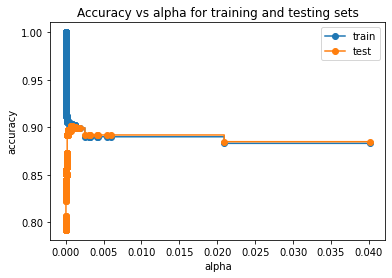

In [ ]:
path=classifier.cost_complexity_pruning_path(train_x,train_y)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities

clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    classifier=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    classifier.fit(train_x,train_y)
    clfs.append(classifier)


train_scores = [clf.score(train_x, train_y) for clf in clfs]
test_scores = [clf.score(test_x, test_y) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

Post Prunning

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(criterion='entropy',random_state=0,ccp_alpha=0.003)
classifier.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.003, criterion='entropy', random_state=0)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(criterion= 'entropy',max_depth= 17,min_samples_leaf= 3,min_samples_split= 12,splitter= 'random')
classifier.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=3,
                       min_samples_split=12, splitter='random')

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

ValueError: ignored

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(test_x)
print(np.concatenate((y_pred.reshape(len(y_pred),1), test_y.reshape(len(test_y),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y, y_pred)
counter1=0
counter2=0
counter3=0
counter4=0
for i in range(len(test_y)):
  if test_y[i] == y_pred[i]:
    counter1+=1
  else:
    counter2+=1
  if y_pred[i]==1:
    counter3+=1
  if test_y[i]==test_y[13]:
    counter+=1
print(counter1)
print(counter3)
print((counter1/(counter1+counter2))*100)
print(cm)
print(test_y)

a=accuracy_score(test_y, y_pred)
print("Current accuracy is {}%".format(a*100))

4064
312
89.89161689891617
[[3876  124]
 [ 333  188]]
[0 0 0 ... 0 0 0]
Current accuracy is 89.89161689891617%


In [ ]:
y_pred = classifier.predict(test_x)
print(np.concatenate((y_pred.reshape(len(y_pred),1), test_y.reshape(len(test_y),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
deleted=0
for j in range(1 , 16):

  types=j

  if types>=1 and types<= 7:

   txtrain= np.delete(train_x, types-1, 1)
   txtest=np.delete(test_x, types-1, 1)
   deleted+=1
  if types==8:
    for i in range(10):
      txtrain= np.delete(train_x, 7+i-deleted, 1)
      txtest=np.delete(test_x, 7+i-deleted, 1)
      deleted+=1
  if types==9:
    for i in range(2):
      txtrain= np.delete(train_x, 17+i-deleted, 1)
      txtest=np.delete(test_x, 17+i-deleted, 1)
      deleted+=1
  if types==10:
    for i in range(3):
      txtrain= np.delete(train_x, 19+i-deleted, 1)
      txtest=np.delete(test_x, 19+i-deleted, 1)
      deleted+=1
  if types==11:
    for i in range(2):
      txtrain= np.delete(train_x, 22+i-deleted, 1)
      txtest=np.delete(test_x, 22+i-deleted, 1)  
      deleted+=1  
  if types==12:
    for i in range(12):
      txtrain= np.delete(train_x, 24+i-deleted, 1)
      txtest=np.delete(test_x, 24+i-deleted, 1)
      deleted+=1  
  if types==13:
     for i in range(3):
      txtrain= np.delete(train_x, 36+i-deleted, 1)
      txtest=np.delete(test_x, 36+i-deleted, 1)
      deleted+=1  
  if types==14:
    for i in range(2):
      txtrain= np.delete(train_x, 39+i-deleted, 1)
      txtest=np.delete(test_x, 39+i-deleted, 1)
      deleted+=1 
  if types==15:
     for i in range(2):
      txtrain= np.delete(train_x, 41+i-deleted, 1)
      txtest=np.delete(test_x, 41+i-deleted, 1) 
      deleted+=1
  if types==16:
     for i in range(2):
      txtrain= np.delete(train_x, 43+i-deleted, 1)
      txtest=np.delete(test_x, 43+i-deleted, 1)
          
  classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

  classifier.fit(txtrain, train_y)
  y_predt = classifier.predict(txtest)
  b=accuracy_score(test_y, y_predt)
  
  if b>a:
    
    train_x=txtrain.copy()
    test_x=txtest.copy()

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

classifier.fit(train_x, train_y)
y_predt = classifier.predict(test_x)
c=accuracy_score(test_y, y_predt)
print("Current accuracy is {}%".format(c*100))

Current accuracy is 85.15815085158151%


## Visualising the Training set results

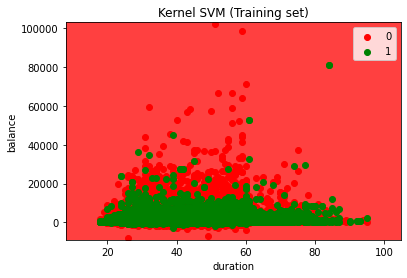

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(train_x), train_y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier1.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('duration')
plt.ylabel('balance')
plt.legend()
plt.show()

## Visualising the Test set results

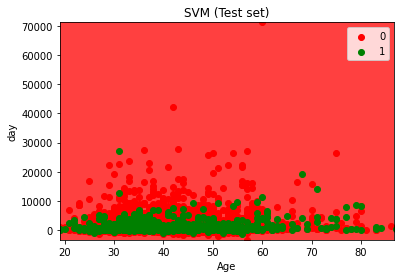

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(test_x), test_y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max() , step = 0.25),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('duration')
plt.ylabel('balance')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
